---

In [2]:
import xarray as xr 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Output segmentation mask 


## Output dataframe

## Simple analysis plot: What is the relationship between cloud ice water path, liquid water path, and surface precipitation? 

In [3]:
data = xr.open_dataset('iwp_lwp_precip_features_day.nc').to_dataframe()

In [4]:
data.mean_precip.max()

np.float64(8.696800231933594)

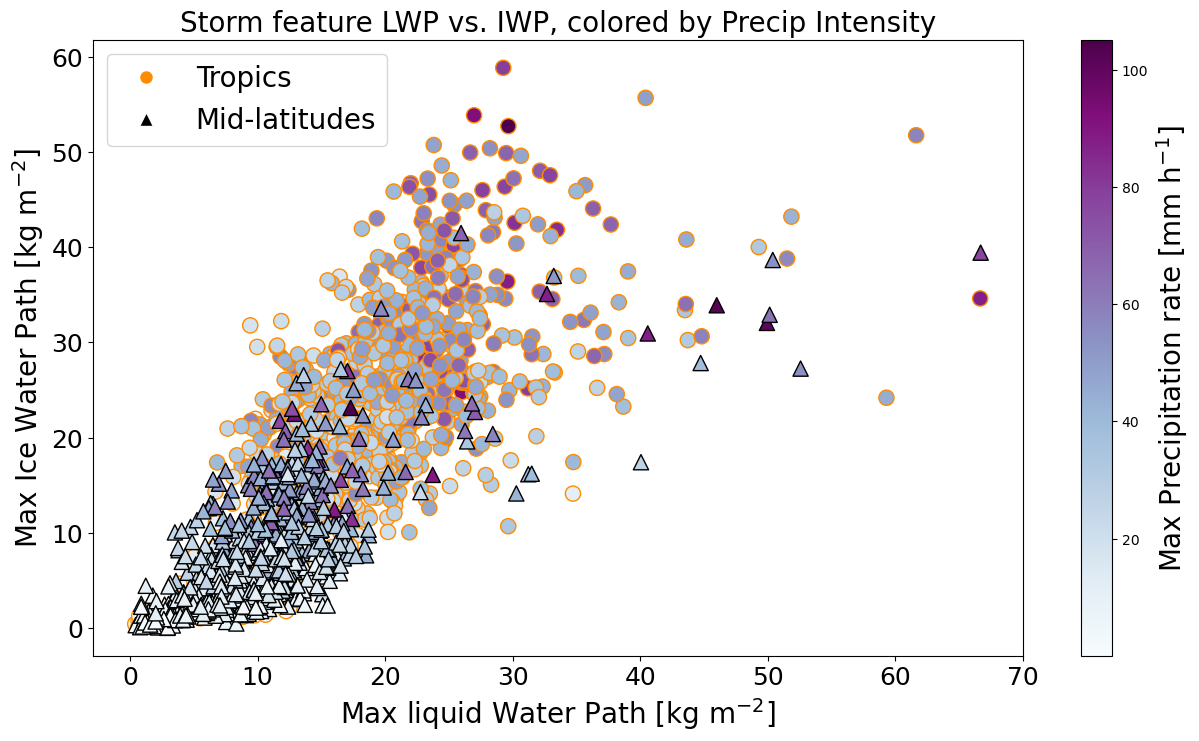

In [24]:
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

# variables 
lwp = data["max_lwp"].values
iwp = data["max_iwp"].values
precip = data["max_precip"].values
lat  = data.lat.values 
lon = data.lon.values 
cmap = 'BuPu'

# subset by climate regime 
tropics_mask = (lat >= -30) & (lat <= 30)
midlat_mask = ((lat >= 30) & (lat <= 60)) | ((lat <= -30) & (lat >= -60))

lwp_trop = lwp[tropics_mask]
iwp_trop = iwp[tropics_mask]
precip_trop = precip[tropics_mask]

lwp_mid = lwp[midlat_mask]
iwp_mid = iwp[midlat_mask]
precip_mid = precip[midlat_mask]

# Plot
size = 120
fs = 20
plt.figure(figsize=(15, 8))

sc1 = plt.scatter(iwp_trop, lwp_trop, c = precip_trop, cmap = cmap , s=size, marker='o', edgecolors='darkorange',  label='Tropics') #norm=LogNorm())
sc2 = plt.scatter(iwp_mid, lwp_mid, c = precip_mid, cmap = cmap, s=size,  marker='^', edgecolors='k',  label='Mid-latitudes') #, norm=LogNorm())


cbar = plt.colorbar(sc1)
cbar.set_label("Max Precipitation rate [mm h$^{-1}$]", size = fs)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Tropics',
           markerfacecolor='darkorange', markersize=10),
    Line2D([0], [0], marker='^', color='w', label='Mid-latitudes',
           markerfacecolor='k', markersize=10)
]
plt.legend(handles=legend_elements, fontsize=fs)


plt.xlabel("Max liquid Water Path [kg m$^{-2}$]", fontsize = fs )
plt.ylabel("Max Ice Water Path [kg m$^{-2}$]",  fontsize = fs)
plt.title("Storm feature LWP vs. IWP, colored by Precip Intensity", fontsize= fs)
plt.tick_params(axis='both', which='major', labelsize=fs - 2)

plt.savefig('/glade/u/home/kukulies/hackathon/iwp_lwp_precip_relationship_max.png')
plt.show()

In [17]:
x = lwp_trop
y = iwp_trop

mask = ~np.isnan(x) & ~np.isnan(y)
x_clean = x[mask]
y_clean = y[mask]

correlation = np.corrcoef(x_clean, y_clean)[0, 1]
print('tropics correlation:', correlation)

x = lwp_mid
y = iwp_mid

mask = ~np.isnan(x) & ~np.isnan(y)
x_clean = x[mask]
y_clean = y[mask]

correlation = np.corrcoef(x_clean, y_clean)[0, 1]
print('mid-latitudes correlation:', correlation)

tropics correlation: 0.6491419022605817
mid-latitudes correlation: 0.7445813901247302


---